In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/jocafneto/repositorio/DsEmProducao/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [1]:
# CPC - SPP

# <font color='blue'>Predição de vendas das Lojas Rossmann</font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Proximos Passos

# <font color='blue'>1. Contexto</font>

- Reunião Mensal de Resultados.
- CFO pediu uma Previsão de Vendas das próximas 6 semanas de cada loja.


# <font color='blue'>2. Desafio</font>

# Problema
- Definição do Budget para a Reforma das Lojas.

# Causa
- Predição de Vendas atual apresentava muita divergência.
- O Processo de Previsão de Vendas é baseado em experiências passadas.
- Toda Previsão de Venda era feita manualmente por cada Loja da Rossmann.
- A visualização das Vendas é limitada ao Computador.


# Solução
- Usar Machine Learning para realizar a Previsão de Vendas de todas as Lojas
- Visualização das Previsões de Vendas poderão ser feitas via Smartphone

# <font color='blue'>3. Desenvolvimento da Solução</font>

# DESCRICAO DOS DADOS

In [8]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## Descriptive Statistics

In [15]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa Mental de Hipoteses

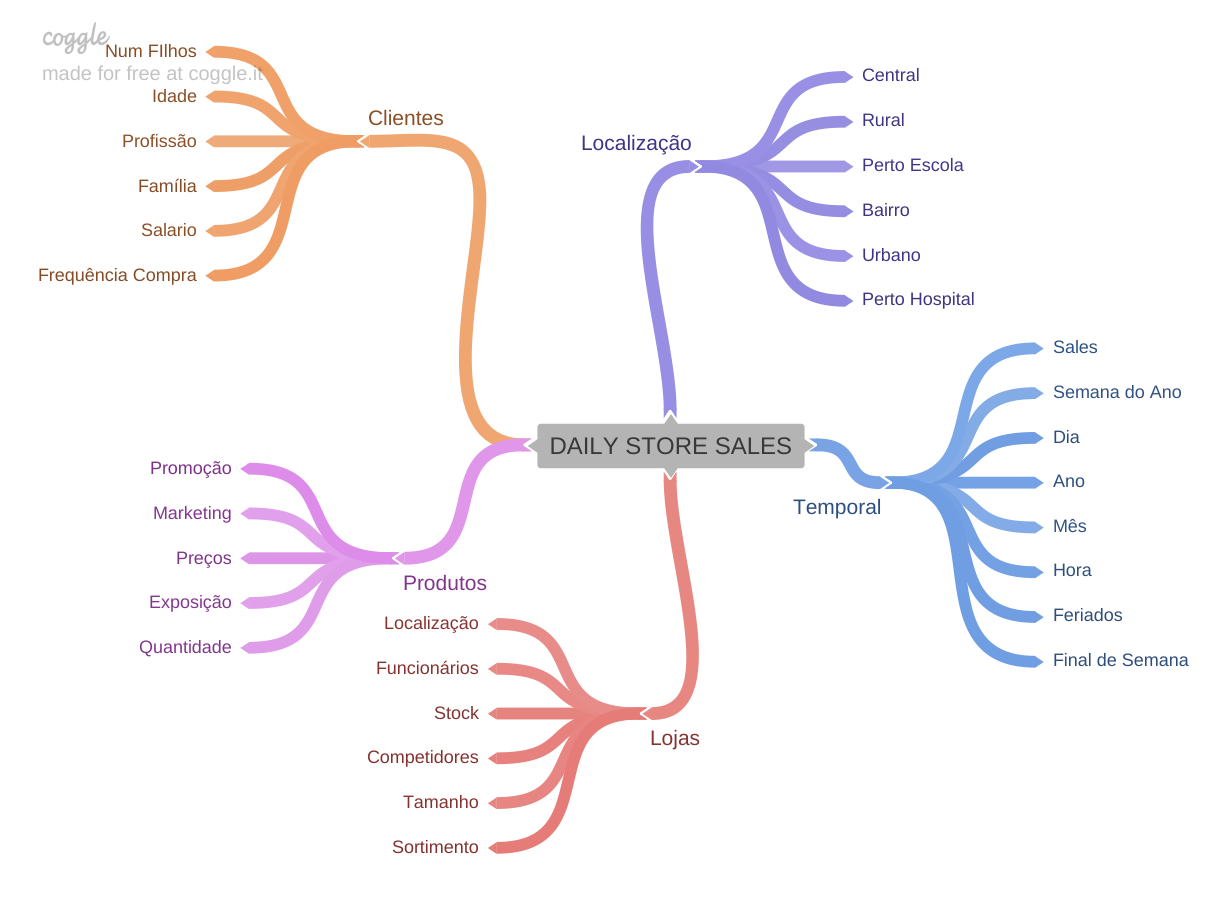

In [21]:
Image('img/MindMapHypotesis.png')

## Hipóteses da Análise Exploratória

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


# ANÁLISE EXPLORATÓRIA DE DADOS

# Response Variable

/home/jocafneto/repositorio/DsEmProducao/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

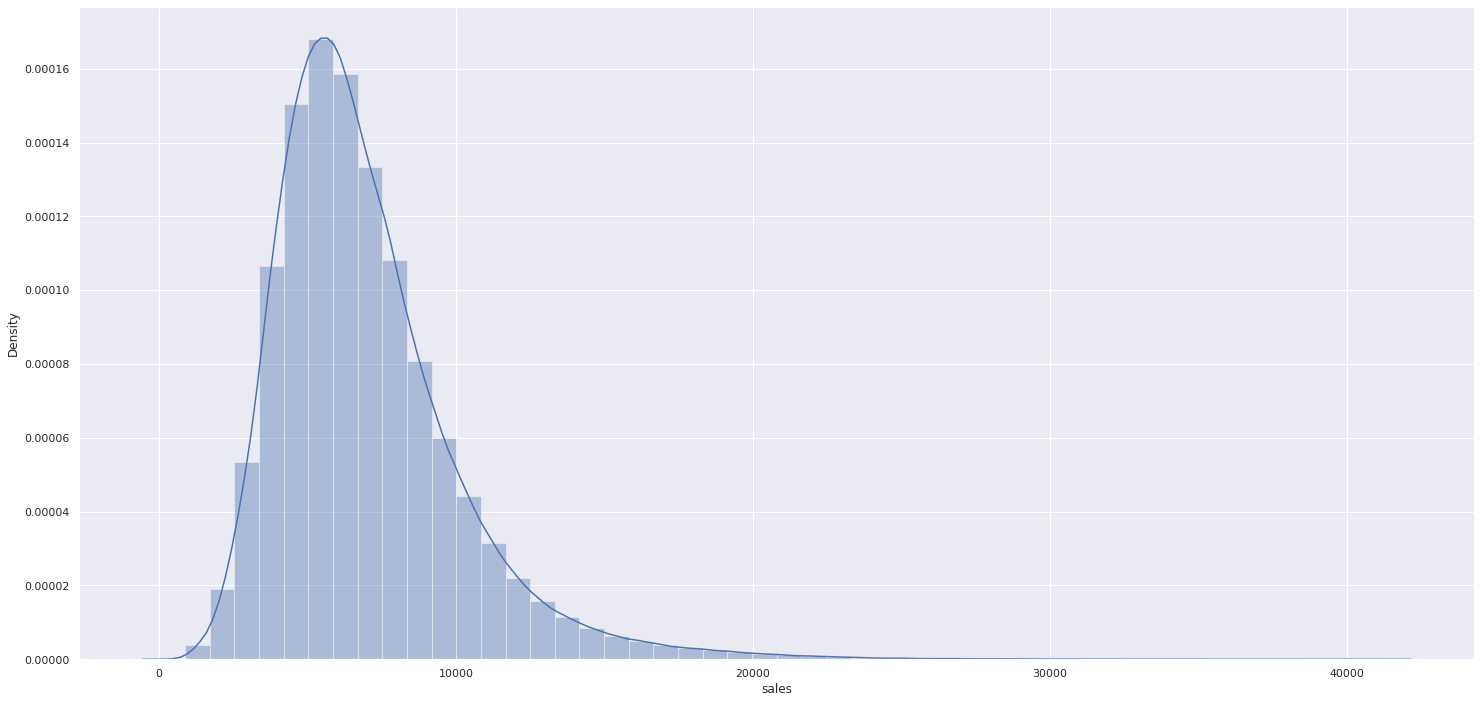

In [28]:
sns.distplot(df4['sales'])

# Numerical Variable

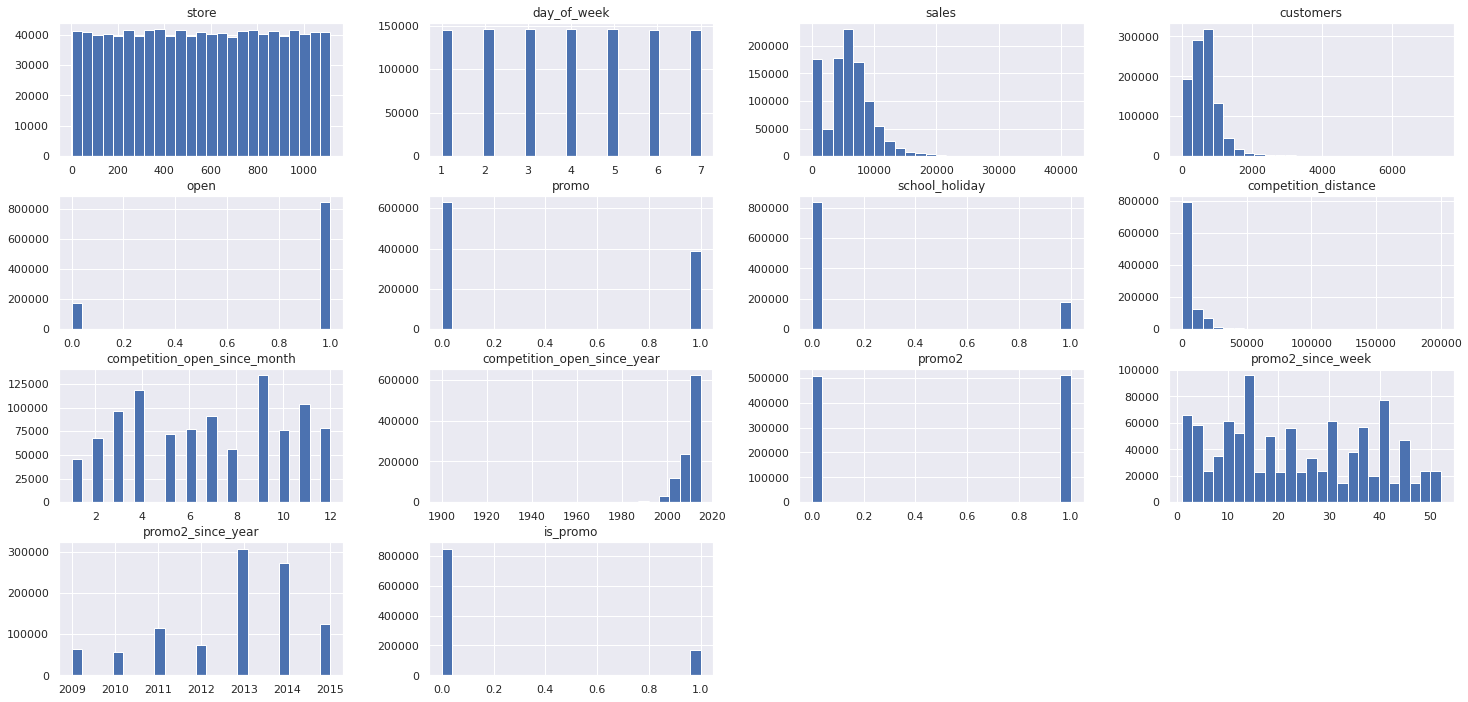

In [29]:
num_attributes.hist(bins=25);

# Categorical Variable

/home/jocafneto/repositorio/DsEmProducao/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jocafneto/repositorio/DsEmProducao/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jocafneto/repositorio/DsEmProducao/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

<AxesSubplot:xlabel='sales', ylabel='Density'>

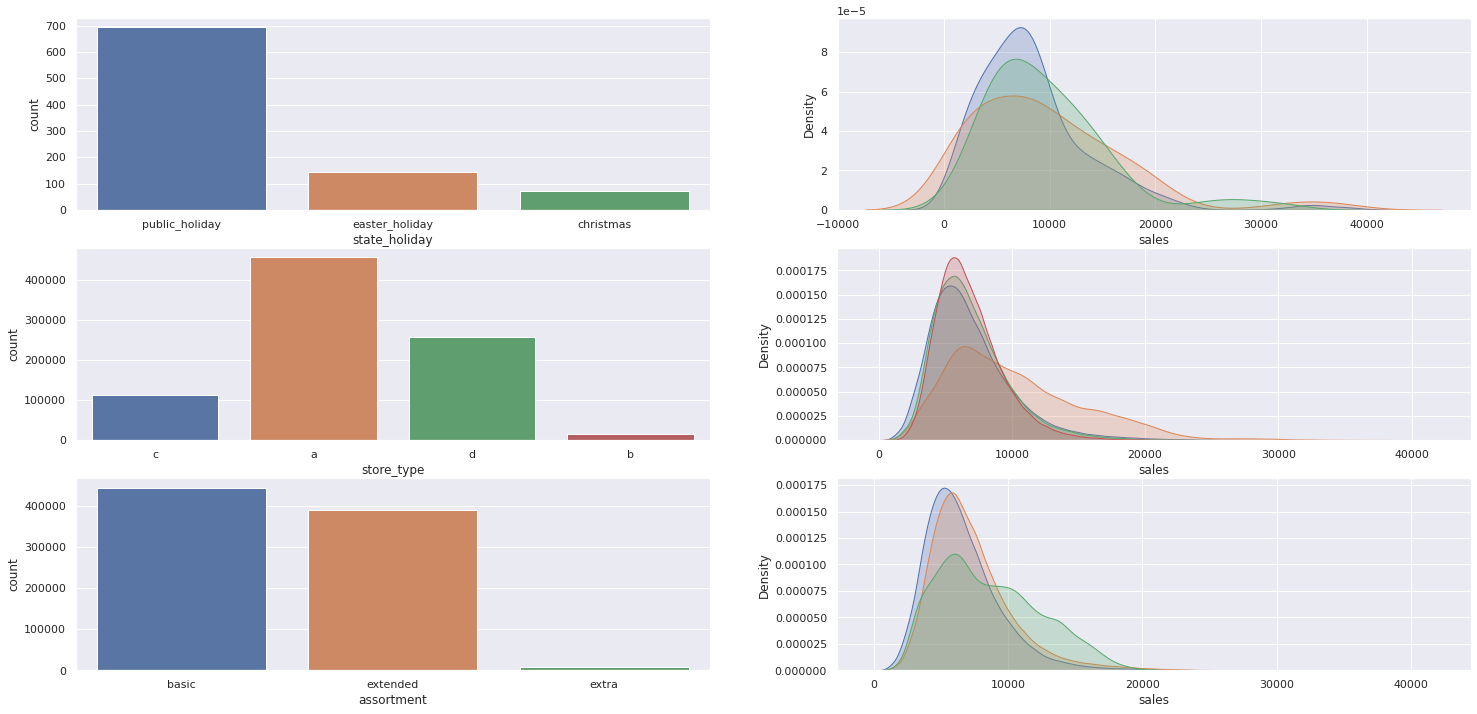

In [31]:
# state holiday
plt.subplot(3,2,1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label ='public_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label ='easter_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label ='christmas', shade=True)


# store_type
plt.subplot(3,2,3)
sns.countplot(df4['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label ='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label ='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label ='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label ='d', shade=True)


# assortment
plt.subplot(3,2,5)
sns.countplot(df4['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label ='basic', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label ='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label ='extra', shade=True)

# Validação das Hipóteses

### 1. Lojas com maior sortimentos deveriam vender mais.

**FALSA**

<AxesSubplot:xlabel='year_week'>

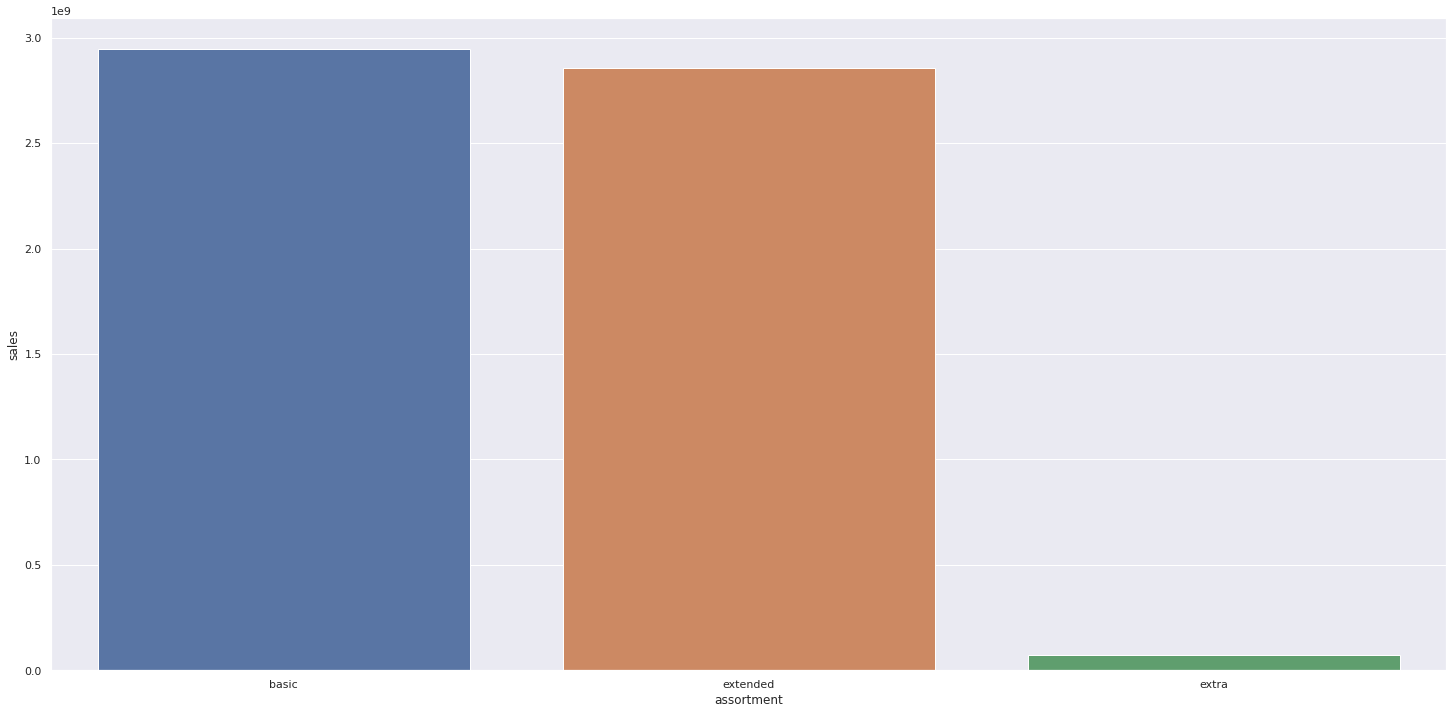

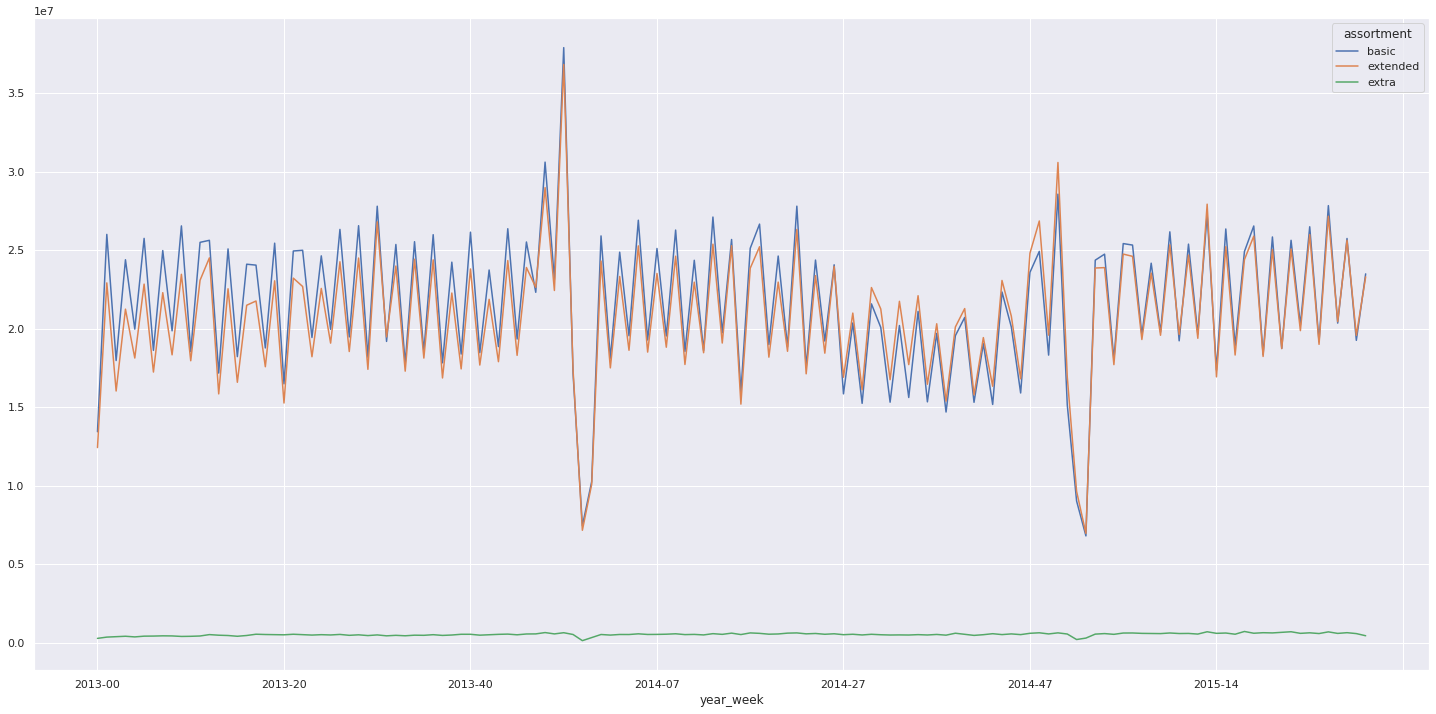

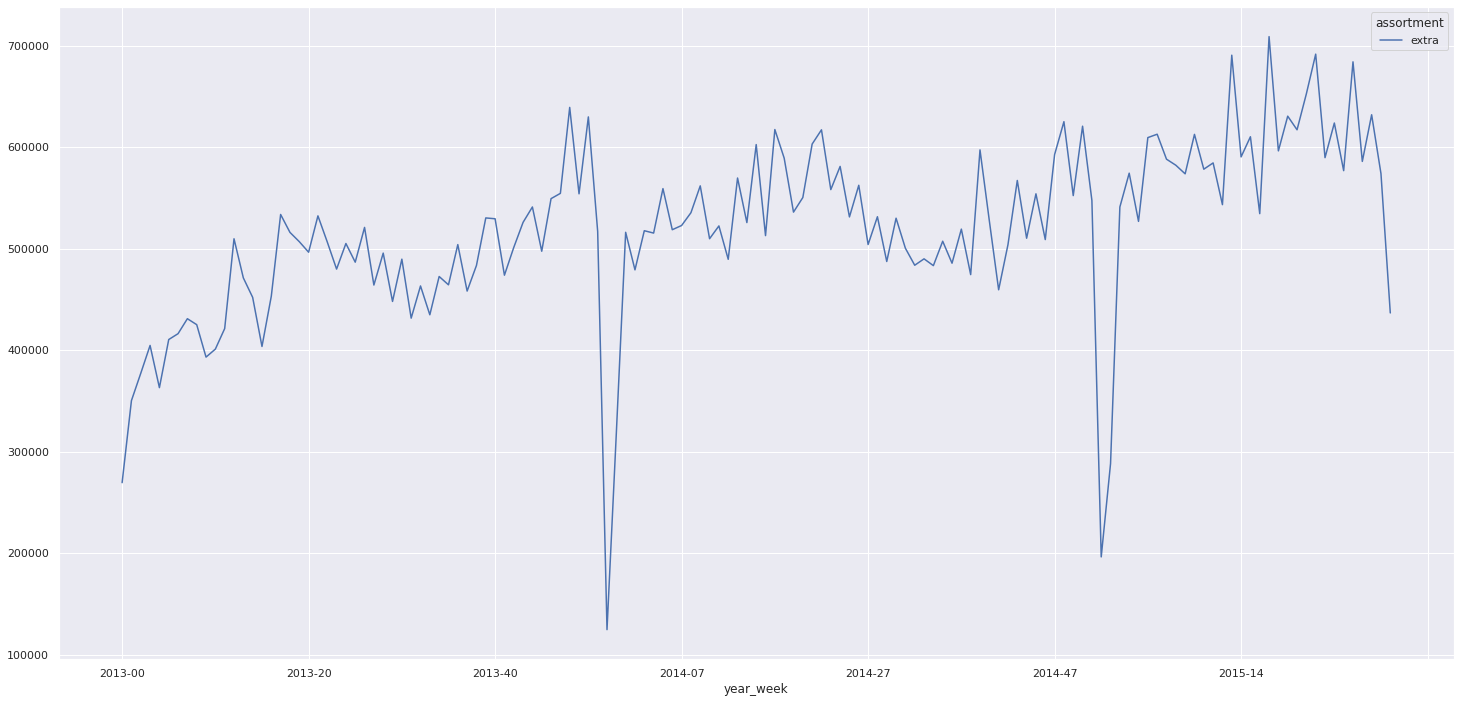

In [32]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1);

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()

### 2. Lojas com competidores mais próximos deveriam vender menos.
**FALSA**

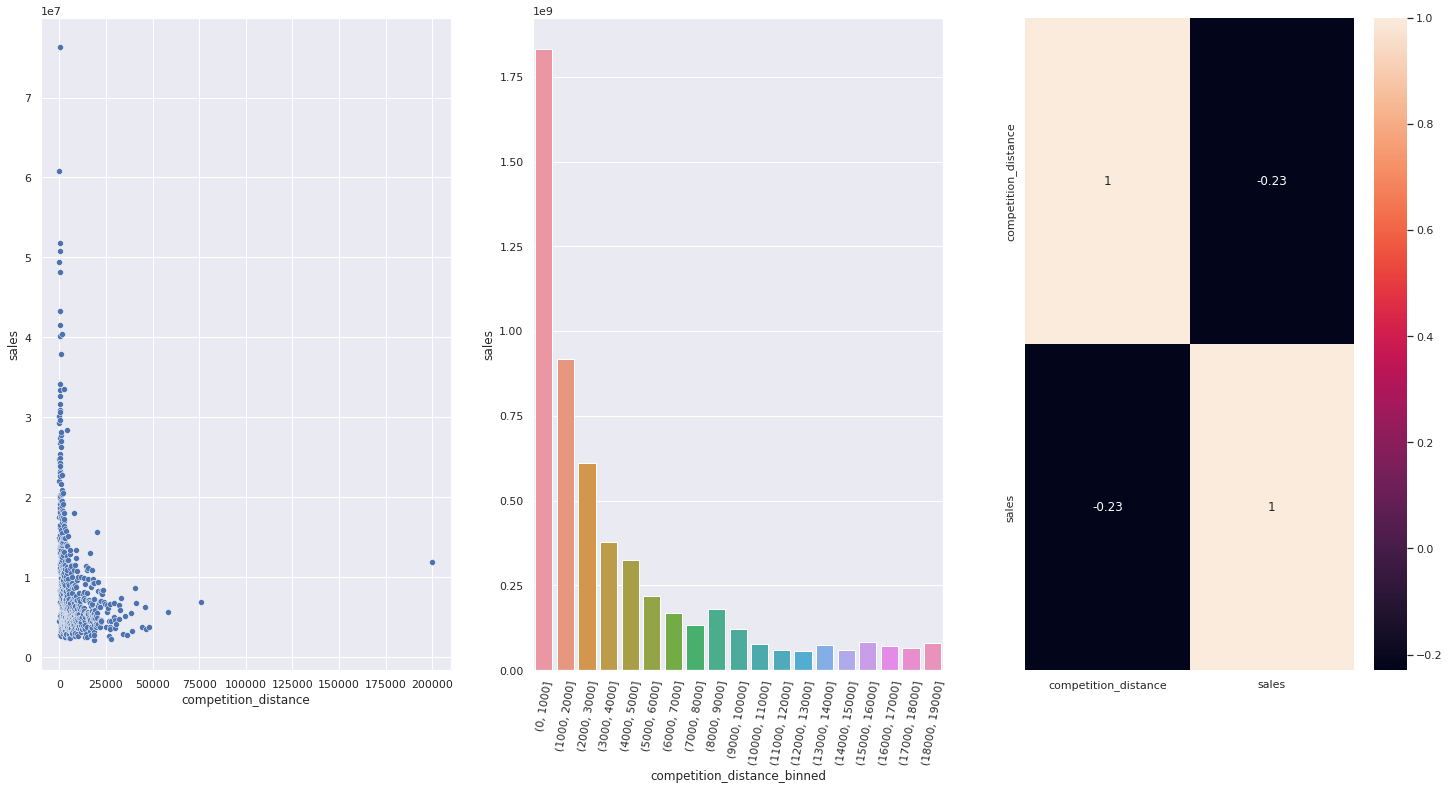

In [33]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1);

plt.subplot(1, 3, 2)
bins = list( np.arange(0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks(rotation=80)

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **8.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA**

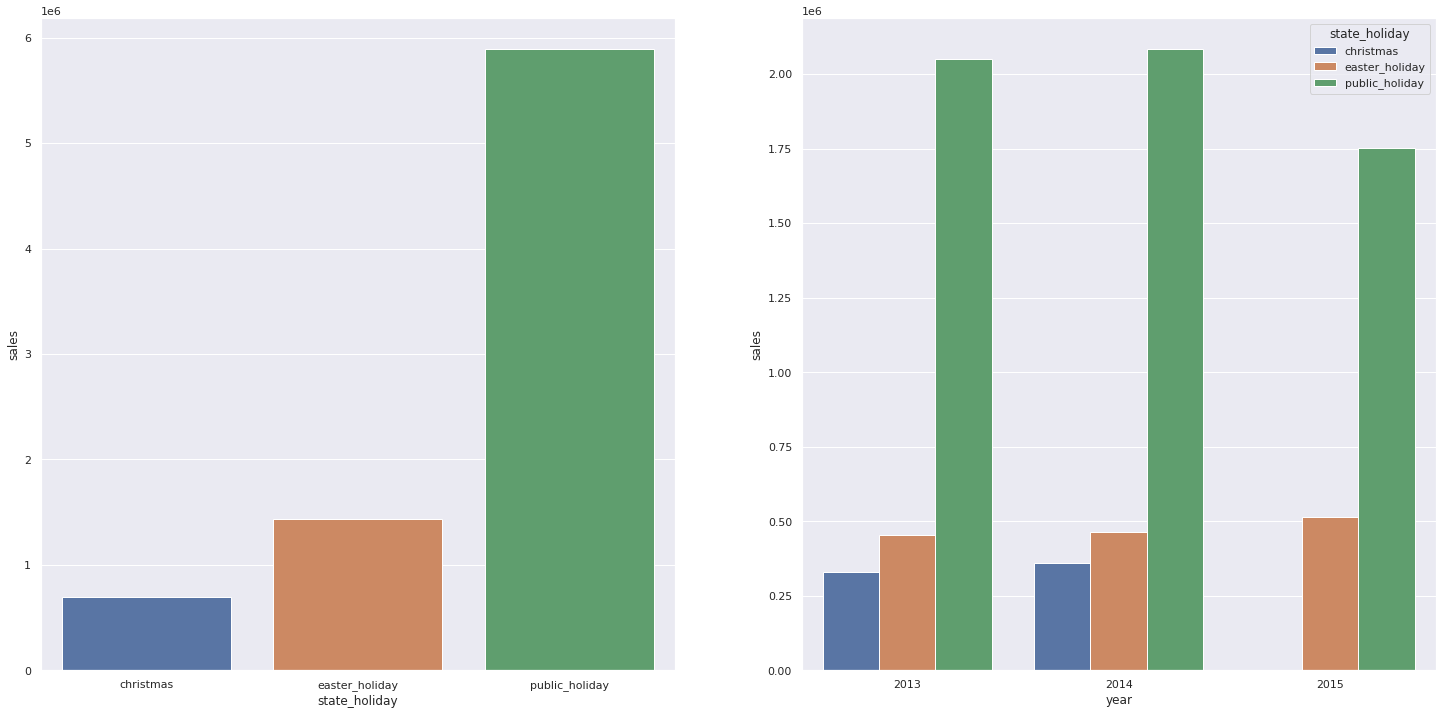

In [38]:
plt.subplot( 1, 2, 1 );
aux = df4[df4['state_holiday'] != 'regular_day']
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 );

plt.subplot( 1, 2, 2 );
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );


### **11.** Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA**

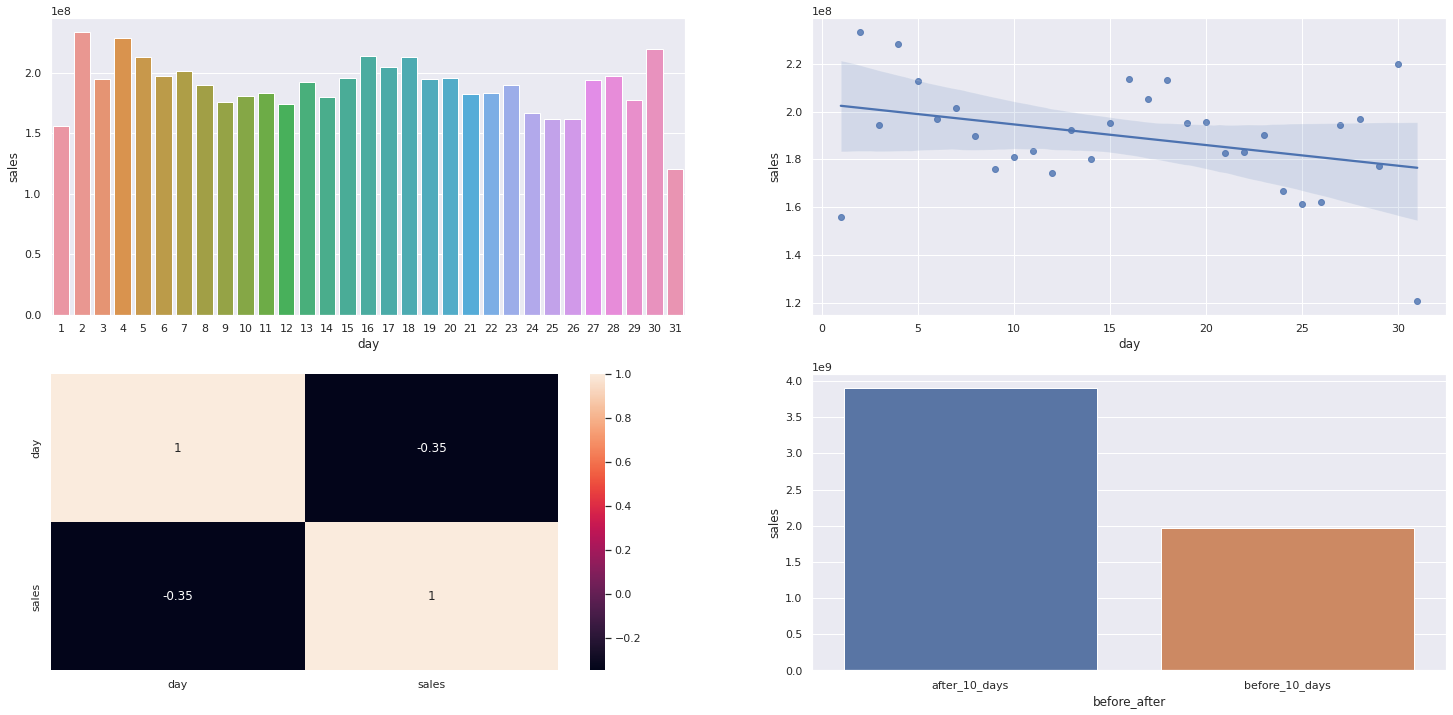

In [41]:
plt.subplot( 2, 2, 1 );
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()
sns.barplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 2 );
sns.regplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 3 );
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x<= 10 else 'after_10_days' )
aux2 = aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()

plt.subplot( 2, 2, 4 );
sns.barplot( x='before_after', y='sales', data=aux2 );

# Resumo das Hipóteses

In [44]:
tab = [['Hipoteses', 'Conclusao', 'Relevância'],
      ['H1', 'falsa', 'baixa'],
      ['H2', 'falsa', 'media'],
      ['H3', 'falsa', 'media'],
      ['H4', 'falsa', 'baixa'],
      ['H5', '-', '-'],
      ['H7', 'falsa', 'baixa'],
      ['H8', 'falsa', 'media'],
      ['H9', 'falsa', 'alta'],
      ['H10', 'falsa', 'alta'],
      ['H11', 'verdadeira', 'alta'],
      ['H12', 'verdadeira', 'alta'],
      ['H13', 'verdadeira', 'baixa']]

print( tabulate( tab, headers='firstrow'))

Hipoteses    Conclusao    Relevância
-----------  -----------  ------------
H1           falsa        baixa
H2           falsa        media
H3           falsa        media
H4           falsa        baixa
H5           -            -
H7           falsa        baixa
H8           falsa        media
H9           falsa        alta
H10          falsa        alta
H11          verdadeira   alta
H12          verdadeira   alta
H13          verdadeira   baixa


# Analise Multivariada

# Numerical Attributes

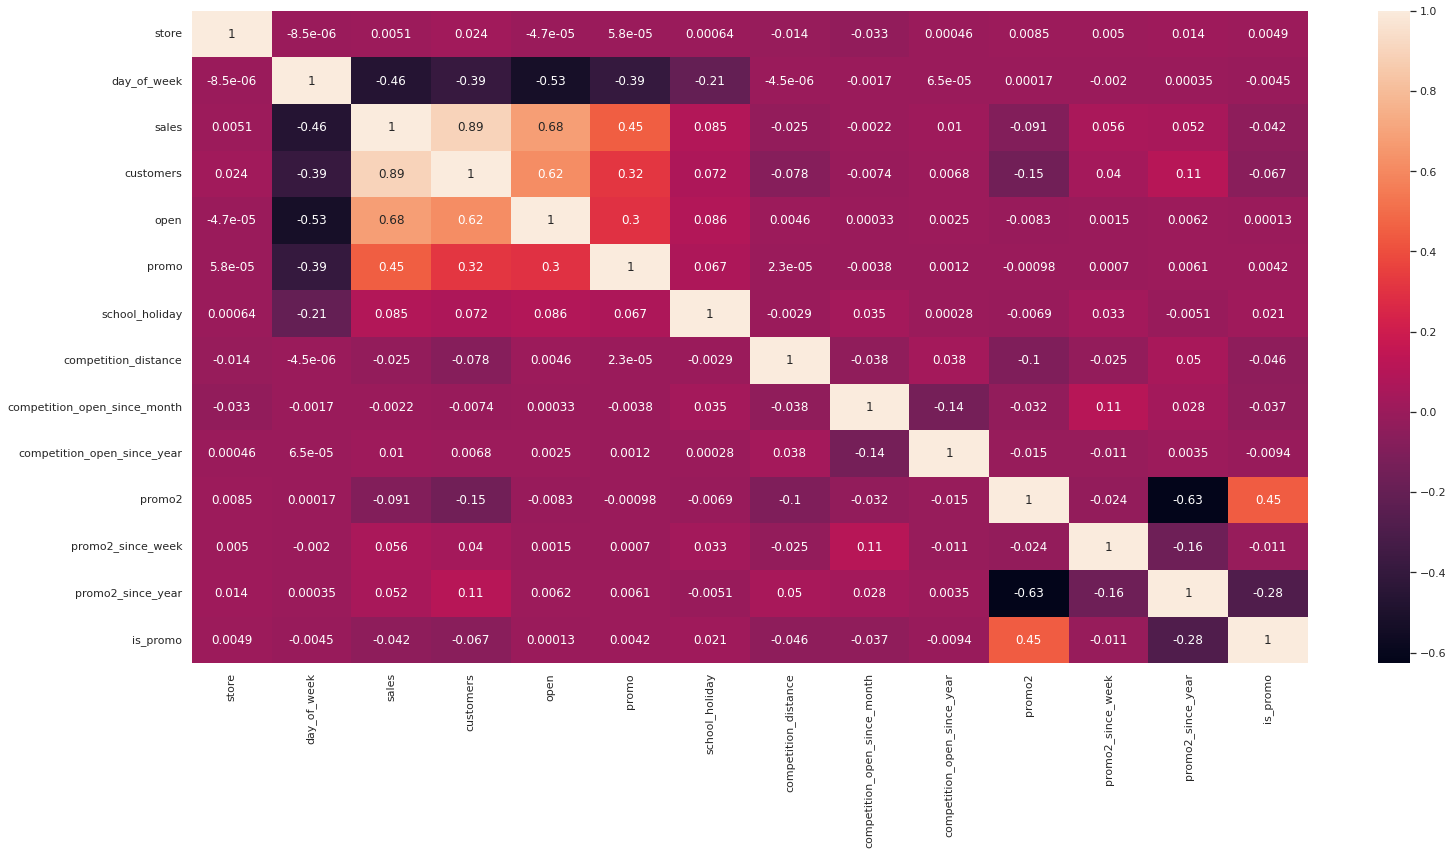

In [45]:
correlation = num_attributes.corr( method='pearson')
sns.heatmap( correlation, annot=True);

# Categorical Attributes

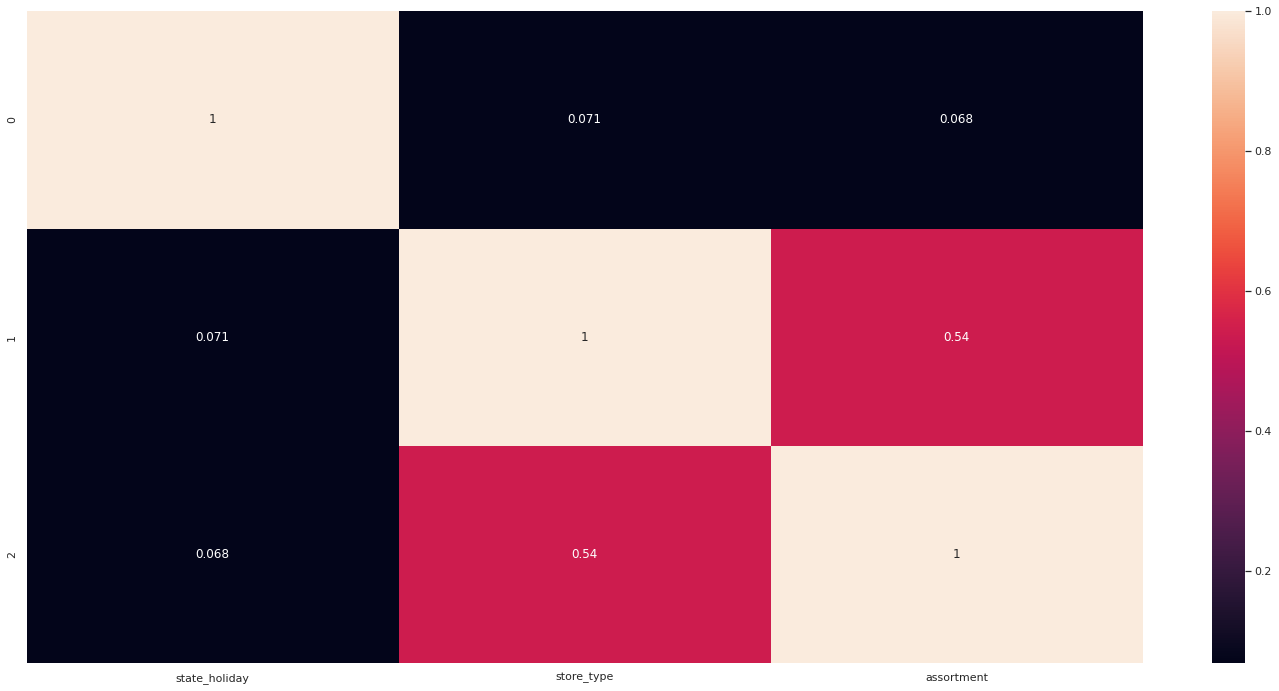

In [47]:
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

d = pd.DataFrame( {'state_holiday': [a1, a2, a3],
                   'store_type': [a4, a5, a6],
                   'assortment': [a7, a8, a9] })
d.set_index( d.columns )

sns.heatmap( d, annot=True);


# MACHINE LEARNING MODELLING

# Compare Model's Performance

In [83]:
# modelling_result = pd.concat( [baseline_result, lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
modelling_result = pd.concat( [lr_result_cv, lrr_result_cv] )
modelling_result.sort_values( 'RMSE CV' )

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26


# <font color='blue'>4. Conclusão & Demonstração</font>

# TRADUÇÃO E INTERPRETAÇÃO DO ERRO

# Business Performance

In [ ]:
df92.sort_values( 'MAPE', ascending=False ).head()

In [ ]:
sns.scatterplot( x='store', y='MAPE', data=df92 )

# Total Performance

In [ ]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index':'Scenarios', 0:'Values'} )
df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )
df93

# Machine Learning Performance

In [ ]:
plt.subplot( 2, 2, 1 )
sns.lineplot( x='date', y='store', data=df9, label='SALES' )
sns.lineplot( x='date', y='predictions', data=df9, label='PREDICTIONS' )

plt.subplot( 2, 2, 2 )
sns.lineplot( x='date', y='error_rate', data=df9, label='SALES' )
plt.axhline( 1, linestyle='--' )

plt.subplot( 2, 2, 3 )
sns.distplot( df9['error'] )

plt.subplot( 2, 2, 4 )
sns.scatterplot( df9['predictions'], df9['error'] )

# <font color='blue'>5. Proximos Passos</font>

- Workshop do Modelo para a Business Users
- Coletar Feedbacks sobre a Usabilidade
- Aumentar em 10% a Acurácia do Modelo


# <font color='blue'>Q & A</font>

# <font color='blue'>Muito Obrigado</font>